In [3]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import cross_val_score, GridSearchCV

In [4]:
from sklearn.model_selection import train_test_split

df = pd.read_csv("final_df.csv")
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

train_data = pd.DataFrame()
val_data = pd.DataFrame()
test_data = pd.DataFrame()

for ervaring in df['ervaring'].unique():
    for geslacht in df['binary_geslacht'].unique():
        for gewichtsklasse in df['binary_gewichtsklasse'].unique():
            subset = df[(df['ervaring'] == ervaring) & (df['binary_geslacht'] == geslacht) & (df['binary_gewichtsklasse'] == gewichtsklasse)]
            if not subset.empty:
                temp_train, temp_temp = train_test_split(subset, test_size=0.3, random_state=42)
                temp_val, temp_test = train_test_split(temp_temp, test_size=0.3, random_state=42)
                train_data = pd.concat([train_data, temp_train])
                val_data = pd.concat([val_data, temp_val])
                test_data = pd.concat([test_data, temp_test])

train_data.reset_index(drop=True, inplace=True)
val_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

print(f"Trainingsdata: {len(train_data)} rijen")
print(f"Validatiedata: {len(val_data)} rijen")
print(f"Testdata: {len(test_data)} rijen")

X_train = train_data.drop(columns=['2k tijd'])
y_train = train_data['2k tijd']
X_val = val_data.drop(columns=['2k tijd'])
y_val = val_data['2k tijd']
X_test = test_data.drop(columns=['2k tijd'])
y_test = test_data['2k tijd']

Trainingsdata: 3018 rijen
Validatiedata: 905 rijen
Testdata: 391 rijen


Example prediction (Random Forest): [381.92122504]
mse_train_rf = 36.75826788628784
mse_val_rf = 63.84021760100294
mse_test_rf = 52.9475748976621
rse_test_rf = 7.276508427650043
train_r2_rf = 0.9646257592848891
val_r2_rf = 0.9375921235811709
test_r2_rf = 0.94844023456193
   Actual Values  Predicted Values (Random Forest)  Difference (Random Forest)
0          427.7                        419.442809                    8.257191
1          420.5                        427.128839                   -6.628839
2          418.6                        423.396286                   -4.796286
3          427.7                        426.553247                    1.146753
4          427.7                        424.550613                    3.149387
5          420.5                        426.777463                   -6.277463
6          421.9                        420.304782                    1.595218
7          449.0                        426.784173                   22.215827
8          431.6 

/home/imme/miniconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


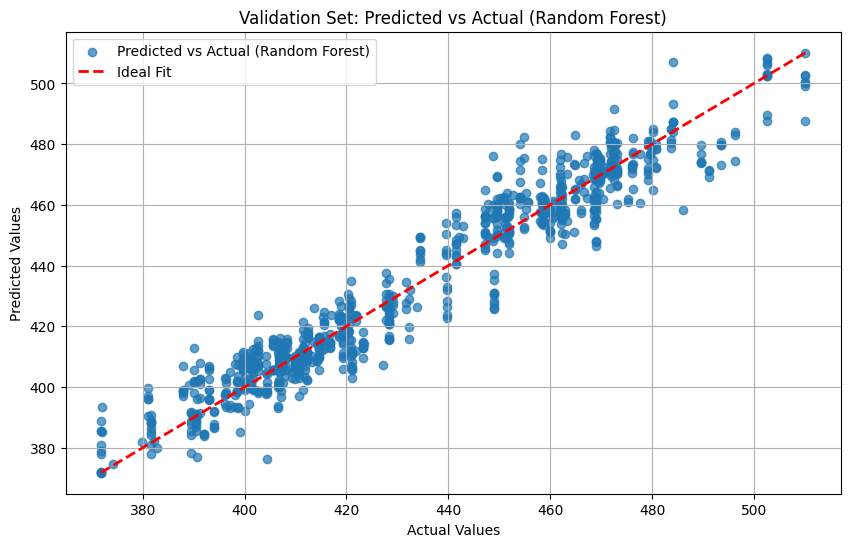

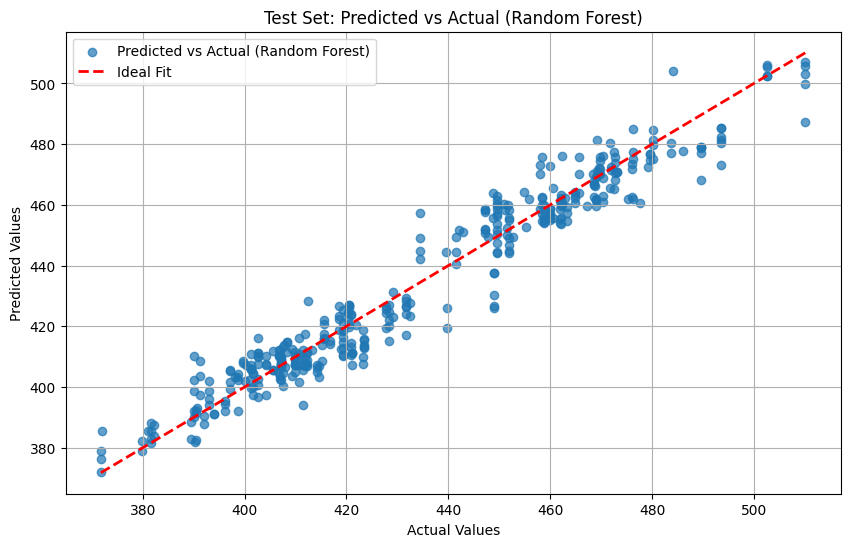

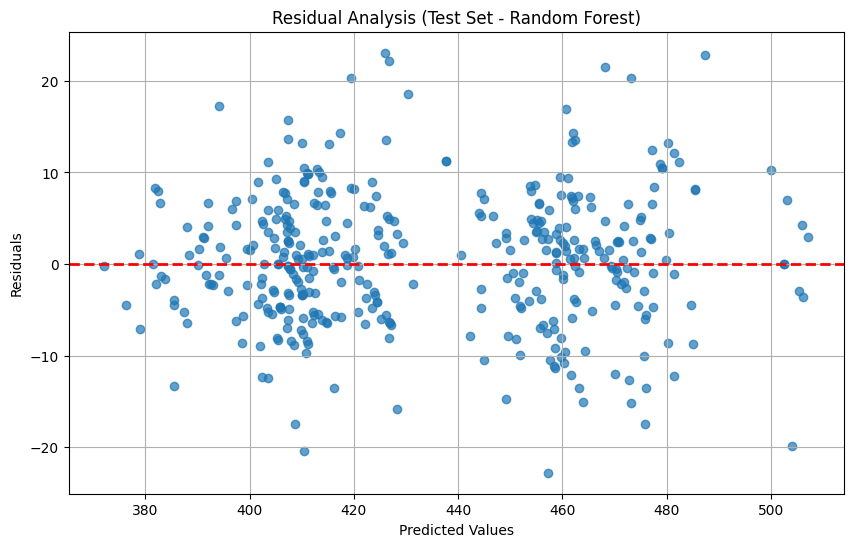

In [5]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

rf_model = RandomForestRegressor(max_depth=10, random_state=0)
rf_model.fit(X_train, y_train)

train_pred_rf = rf_model.predict(X_train)
val_pred_rf = rf_model.predict(X_val)
test_pred_rf = rf_model.predict(X_test)

example_input = np.array([[1, 104.6, 0, 0, 1]])
example_prediction_rf = rf_model.predict(example_input)
print(f'Example prediction (Random Forest): {example_prediction_rf}')

mse_train_rf = mean_squared_error(y_train, train_pred_rf)
mse_val_rf = mean_squared_error(y_val, val_pred_rf)
mse_test_rf = mean_squared_error(y_test, test_pred_rf)
rse_test_rf = np.sqrt(mse_test_rf)

print(f'mse_train_rf = {mse_train_rf}')
print(f'mse_val_rf = {mse_val_rf}')
print(f'mse_test_rf = {mse_test_rf}')
print(f'rse_test_rf = {rse_test_rf}')

train_r2_rf = r2_score(y_train, train_pred_rf)
val_r2_rf = r2_score(y_val, val_pred_rf)
test_r2_rf = r2_score(y_test, test_pred_rf)

print(f'train_r2_rf = {train_r2_rf}')
print(f'val_r2_rf = {val_r2_rf}')
print(f'test_r2_rf = {test_r2_rf}')

results_rf = pd.DataFrame({
    'Actual Values': y_test,
    'Predicted Values (Random Forest)': test_pred_rf,
    'Difference (Random Forest)': y_test - test_pred_rf
})
print(results_rf.head(10))

plt.figure(figsize=(10, 6))
plt.scatter(y_val, val_pred_rf, alpha=0.7, label='Predicted vs Actual (Random Forest)')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Validation Set: Predicted vs Actual (Random Forest)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_pred_rf, alpha=0.7, label='Predicted vs Actual (Random Forest)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Test Set: Predicted vs Actual (Random Forest)')
plt.legend()
plt.grid(True)
plt.show()

residuals_rf = y_test - test_pred_rf
plt.figure(figsize=(10, 6))
plt.scatter(test_pred_rf, residuals_rf, alpha=0.7)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis (Test Set - Random Forest)')
plt.grid(True)
plt.show()


In [6]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import itertools

max_depths = range(1, 15)
n_estimators = range(50,100, 200)
min_samples_split = [2, 5, 10, 15]
results = []
best_params = None
best_mse = float('inf')

for max_depth, n_estimators, min_samples_split in itertools.product(max_depths, n_estimators, min_samples_split):
    model = RandomForestRegressor(
        max_depth=max_depth, 
        n_estimators=n_estimators,
        min_samples_split=min_samples_split,
        random_state=42)
    model.fit(X_train, y_train)
    predictions = model.predict(X_val)
    mse = mean_squared_error(y_val, predictions)

    results.append((max_depth, n_estimators, min_samples_split, mse))
    if mse < best_mse:
        best_mse = mse
        best_params = {
            'max_depth': max_depth,
            'n_estimators': n_estimators,
            'min_samples_split': min_samples_split
        }

print(f'Best Parameters: {best_params}')


Best Parameters: {'max_depth': 10, 'n_estimators': 50, 'min_samples_split': 10}


In [7]:

param_grid = {'max_depth': [3, 5, 7, 10, 13, 16],
              'n_estimators': [100, 200, 300],
              'min_samples_split': [2, 5, 10, 13, 16]}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_maxdepth = grid_search.best_params_['max_depth']
best_nestimators = grid_search.best_params_['n_estimators']
best_samples_split = grid_search.best_params_['min_samples_split']
print('Best maxdepth:', best_maxdepth)
print('Best estimators:', best_nestimators)
print('Best sample split:', best_samples_split)


/home/imme/miniconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best maxdepth: 13
Best estimators: 200
Best sample split: 13
